# Example 6 : Manifold Clustering with tSNE


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200 # bigger figures

# Use more REVTEX-esque fonts
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIXGeneral"
mpl.rcParams["mathtext.fontset"] = "stix"

# Simple Case 2D Scatter Plot of Three Generated Distributions

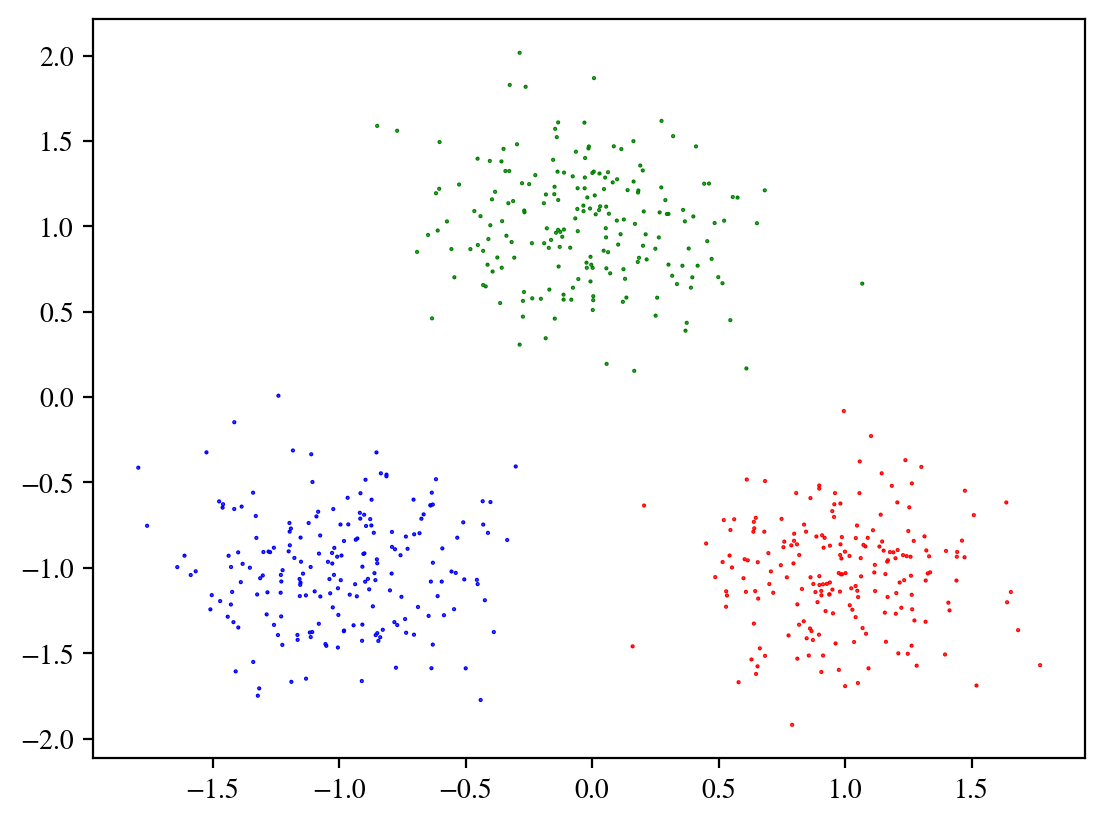

In [61]:
rng = np.random.default_rng(1729)

test_r = rng.multivariate_normal([1.0,-1.0], [[0.1,0],[0,0.1]], size=200)
test_b = rng.multivariate_normal([-1.0,-1.0], [[0.1,0],[0,0.1]], size=200)
test_g = rng.multivariate_normal([0.0,1.0], [[0.1,0],[0,0.1]], size=200)
col_tag = np.concatenate((np.tile('r', 200),np.tile('b', 200),np.tile('g', 200))) 
test_data = np.concatenate((test_r,test_b,test_g))

plt.scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
plt.show()

Then we will run the fit method on our data set, it should be noted openTSNE expects data to be in the form of a numpy array. If our data was in a dataframe, one can use the inbuilt pandas function to convert to a numpy array.
```python
data_np = data_dataframe.to_numpy()
```

For the moment let's use the default settings of the openTSNE embedding and see how our test set changes. This calculation will not be fast (as you will see from the output of the cell magic %%time command).

In [62]:
from openTSNE import TSNE

tsne = TSNE() # Use all the defaults of the regular embedding

In [63]:
%%time 
tsne_embed = tsne.fit(test_data)

CPU times: total: 10.1 s
Wall time: 10.7 s


The embedding will return a numpy array that we can plot in matplotlib. We will plot the first t-SNE component on the x-axis and the second t-SNE  component on the y-axis. Using the col_tag array we can compare what the t-SNE did to the points of each of the three distributions.

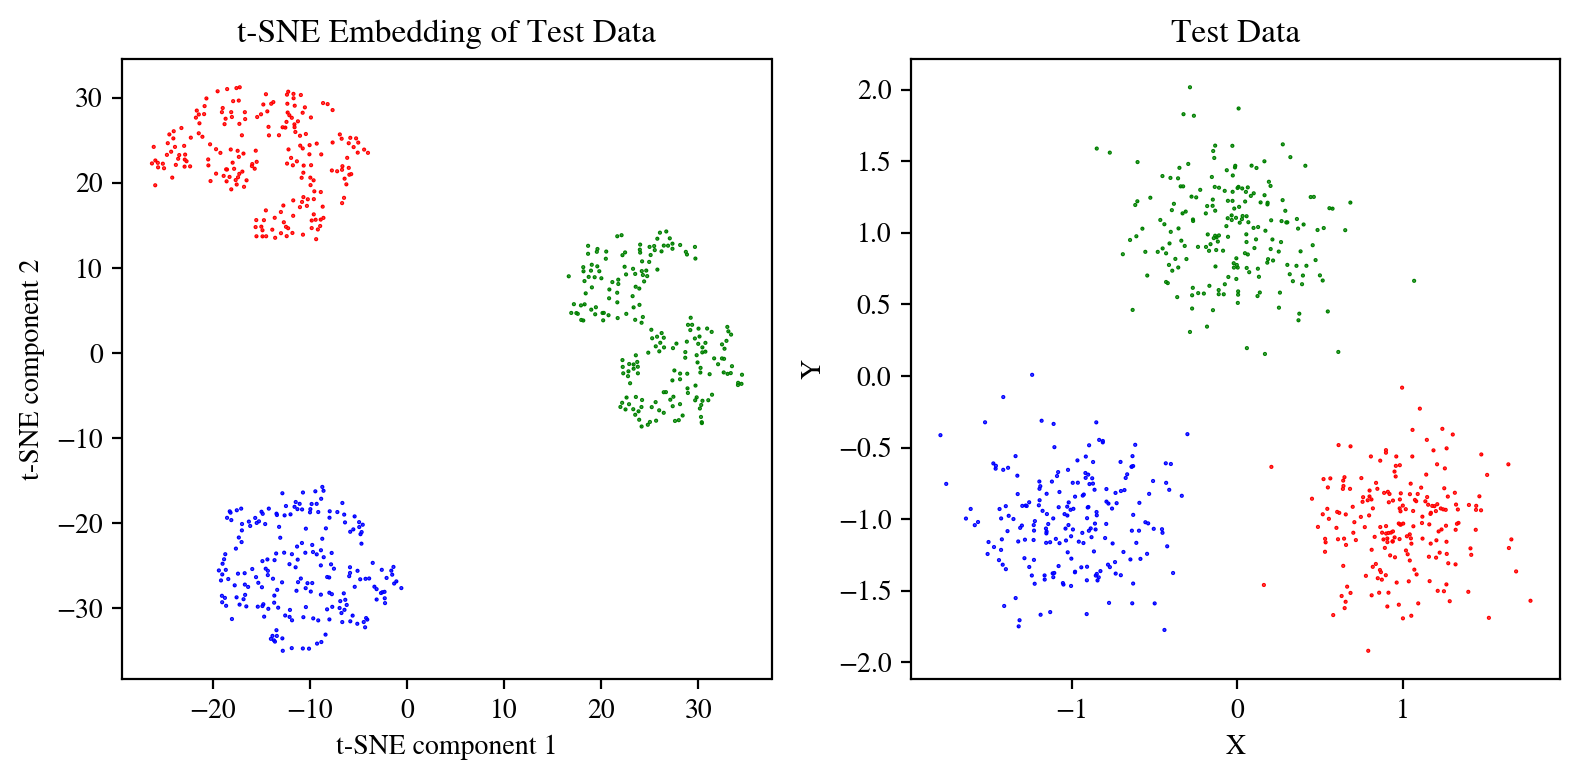

In [69]:
fig, ax = plt.subplots(1,2)
#
ax[0].set_title('t-SNE Embedding of Test Data')
ax[0].scatter(tsne_embed[:,0], tsne_embed[:,1], marker='.', s=1, color=col_tag)
ax[0].set_xlabel('t-SNE component 1')
ax[0].set_ylabel('t-SNE component 2')
#
ax[1].set_title('Test Data')
ax[1].scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

fig.set_size_inches(8,4)
plt.tight_layout()
plt.show()

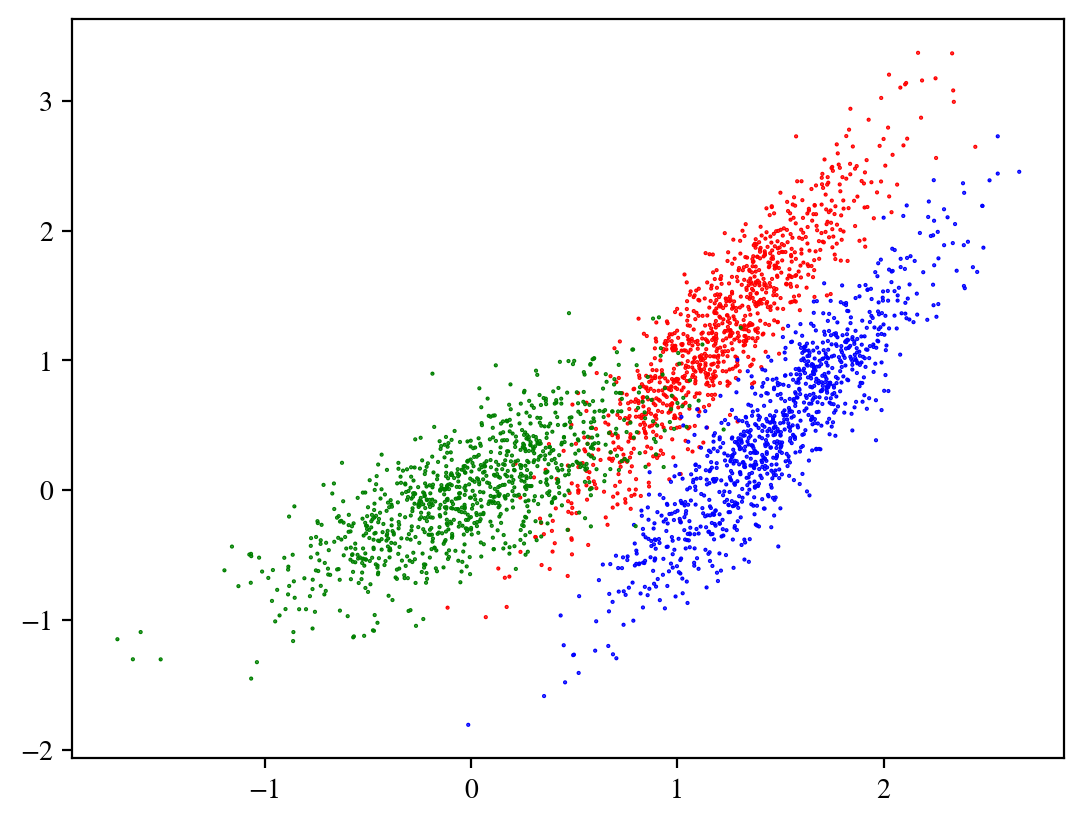

In [70]:
rng = np.random.default_rng()

test_r = rng.multivariate_normal([1.2,1.2], [[0.15,0.25],[0.25,0.5]], size=1000)
test_b = rng.multivariate_normal([1.5,0.5], [[0.15,0.25],[0.25,0.5]], size=1000)
test_g = rng.multivariate_normal([0.0,0.0], [[0.2,0.15],[0.15,0.2]], size=1000)
col_tag = np.concatenate((np.tile('r', 1000),np.tile('b', 1000),np.tile('g', 1000))) 
test_data = np.concatenate((test_r,test_b,test_g))

plt.scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
plt.show()

In [71]:
%%time 
tsne_embed = tsne.fit(test_data)

CPU times: total: 1min 18s
Wall time: 1min 24s


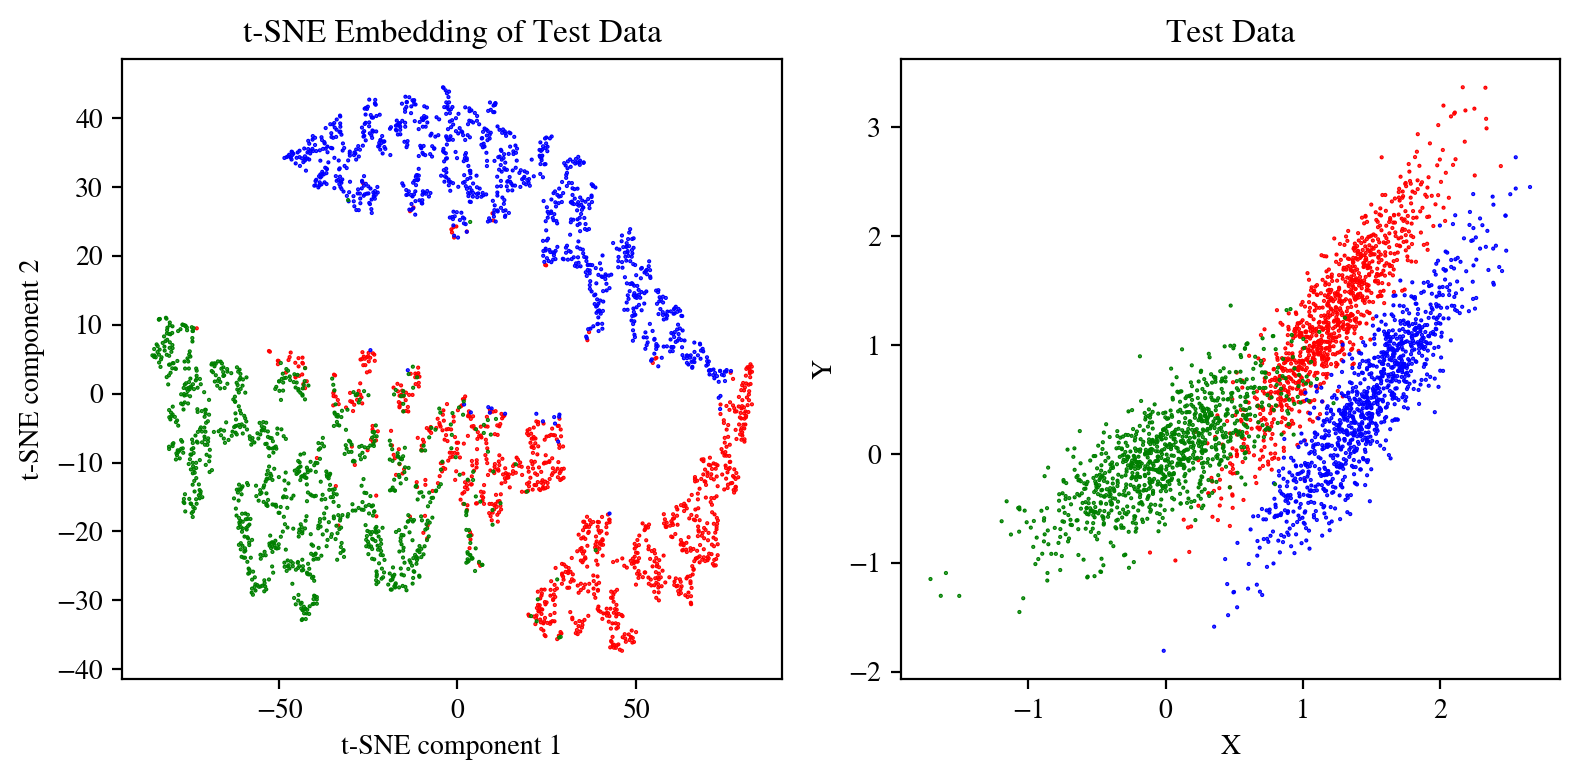

In [72]:
fig, ax = plt.subplots(1,2)
#
ax[0].set_title('t-SNE Embedding of Test Data')
ax[0].scatter(tsne_embed[:,0], tsne_embed[:,1], marker='.', s=1, color=col_tag)
ax[0].set_xlabel('t-SNE component 1')
ax[0].set_ylabel('t-SNE component 2')
#
ax[1].set_title('Test Data')
ax[1].scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

fig.set_size_inches(8,4)
plt.tight_layout()
plt.show()